# Importing Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
import numpy as np

In [6]:
import statsmodels.api as sm

In [7]:
from scipy.optimize import curve_fit

# Data Loading

In [8]:
energy_dataset = pd.read_csv("energy_dataset.csv")

In [9]:
population_df = pd.read_csv("population.csv")

In [10]:
pcc_df = pd.read_csv("per_capita_consumption.csv")

In [11]:
tangedco_df = pd.read_csv("energy_development.csv")

In [12]:
ev_df = pd.read_csv("tamilnadu_vehicles_reg.csv")

In [13]:
vahaan_df = pd.read_csv("tamilnadu_vehicles_reg.csv")

# Data Pre-Processing

## Energy Dataset

In [14]:
energy_dataset.columns.tolist()

['Country',
 'State',
 'Year',
 'Region-Wise Installation Of Electricity',
 'Energy Value Type (Potential, Capacity, Generation)',
 'Types Of Energy Sources',
 'Nature Of Energy Sources',
 'Types Of Usage (Utility ,Captive)',
 'Type Of Energy Sector',
 'Values For Renewable Electricity (UOM:MW(MegaWatt)), Scaling Factor:1']

In [15]:
# Droping Country column
energy_dataset.drop('Country', axis=1, inplace=True)

In [16]:
energy_dataset.shape

(8656, 9)

In [17]:
# Only taking TN
energy_dataset = energy_dataset[energy_dataset["State"] == "Tamil Nadu"]

In [18]:
energy_dataset.shape

(435, 9)

In [19]:
# Removing since all row value would be same -> Tamil Nadu and South Region
energy_dataset.drop(['State', 'Region-Wise Installation Of Electricity'], axis=1, inplace=True)

In [20]:
energy_dataset.rename(columns={
    "Year" : "year",
    "Energy Value Type (Potential, Capacity, Generation)": "energy_value_type",
    "Types Of Energy Sources": "energy_source_type",
    "Nature Of Energy Sources" : "energy_source_nature",
    "Types Of Usage (Utility ,Captive)":"usage_type",
    "Type Of Energy Sector":"energy_sector_type",
    "Values For Renewable Electricity (UOM:MW(MegaWatt)), Scaling Factor:1" : "electricity_values"
}, inplace=True)


In [21]:
energy_dataset.head(5)

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
596,2020,Capacity,COGENERATION-BAGASSE,NaN,NaN,NaN,997.55
597,2020,Capacity,SMALL HYDRO,NaN,NaN,NaN,123.05
598,2020,Capacity,SOLAR,NaN,NaN,NaN,3915.88
599,2020,Capacity,WASTE,NaN,NaN,NaN,6.40
600,2020,Capacity,WIND,NaN,NaN,NaN,9308.64


In [22]:
print("energy_value_type")
print("Missing Values",energy_dataset["energy_value_type"].isna().sum())
print("Unique count:", energy_dataset["energy_value_type"].nunique())
print("Unique values:", energy_dataset["energy_value_type"].unique())

energy_value_type
Missing Values 0
Unique count: 3
Unique values: ['Capacity' 'Potential' 'Generation']


In [23]:
print("energy_source_type")
print("Missing Values",energy_dataset["energy_source_type"].isna().sum())
print("Unique count:", energy_dataset["energy_source_type"].nunique())
print("Unique values:", energy_dataset["energy_source_type"].unique())

energy_source_type
Missing Values 0
Unique count: 17
Unique values: ['COGENERATION-BAGASSE' 'SMALL HYDRO' 'SOLAR' 'WASTE' 'WIND' 'BIOMASS'
 'BIOMASS-BAGASSE' 'COAL' 'DIESEL' 'HYDRO' 'NATURAL GAS' 'NUCLEAR'
 'RENEWABLES' 'NAPHTHA' 'LIGNITE' 'OIL & GAS' 'BIO POWER']


In [24]:
print("energy_source_nature")
print("Missing Values",energy_dataset["energy_source_nature"].isna().sum())
print("Unique count:", energy_dataset["energy_source_nature"].nunique())
print("Unique values:", energy_dataset["energy_source_nature"].unique())

energy_source_nature
Missing Values 145
Unique count: 2
Unique values: [nan 'RENEWABLE' 'NON-RENEWABLE']


In [25]:
print("usage_type")
print("Missing Values",energy_dataset["usage_type"].isna().sum())
print("Unique count:", energy_dataset["usage_type"].nunique())
print("Unique values:", energy_dataset["usage_type"].unique())

usage_type
Missing Values 132
Unique count: 2
Unique values: [nan 'UTILITY' 'CAPTIVE']


In [26]:
print("energy_sector_type")
print("Missing Values",energy_dataset["energy_sector_type"].isna().sum())
print("Unique count:", energy_dataset["energy_sector_type"].nunique())
print("Unique values:", energy_dataset["energy_sector_type"].unique())

energy_sector_type
Missing Values 132
Unique count: 5
Unique values: [nan 'UTILITY-RE' 'CAPTIVE' 'CENTRAL' 'PRIVATE' 'STATE']


In [27]:
print("Electricity Values")
print("Missing Values : " ,energy_dataset["electricity_values"].isna().sum())

Electricity Values
Missing Values :  0


In [28]:
energy_dataset.sort_values(by="year", ascending=True, inplace=True)

In [29]:
energy_dataset.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
8521,2006,Generation,NUCLEAR,NON-RENEWABLE,UTILITY,CENTRAL,1853.41
8522,2006,Generation,RENEWABLES,RENEWABLE,UTILITY,UTILITY-RE,3444.28
8523,2006,Generation,WIND,RENEWABLE,CAPTIVE,CAPTIVE,187.86
8512,2006,Generation,COAL,NON-RENEWABLE,UTILITY,STATE,18794.79
8516,2006,Generation,HYDRO,NON-RENEWABLE,UTILITY,STATE,6110.47


In [30]:
energy_dataset.reset_index(drop=True, inplace=True)

In [31]:
#Filling missing values for energy_source_nature

renewables = ['COGENERATION-BAGASSE', 'SMALL HYDRO', 'SOLAR', 'WASTE', 
              'WIND', 'BIOMASS', 'BIOMASS-BAGASSE', 'HYDRO', 'RENEWABLES','BIO POWER']

energy_dataset['energy_source_nature'] = energy_dataset['energy_source_type'].apply(
    lambda x: 'Renewable' if x in renewables else 'Non-Renewable'
)

In [32]:
energy_dataset.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2006,Generation,NUCLEAR,Non-Renewable,UTILITY,CENTRAL,1853.41
1,2006,Generation,RENEWABLES,Renewable,UTILITY,UTILITY-RE,3444.28
2,2006,Generation,WIND,Renewable,CAPTIVE,CAPTIVE,187.86
3,2006,Generation,COAL,Non-Renewable,UTILITY,STATE,18794.79
4,2006,Generation,HYDRO,Renewable,UTILITY,STATE,6110.47


In [33]:
print("checking energy_source_nature")
print("Missing Values",energy_dataset["energy_source_nature"].isna().sum())
print("Unique count:", energy_dataset["energy_source_nature"].nunique())
print("Unique values:", energy_dataset["energy_source_nature"].unique())

checking energy_source_nature
Missing Values 0
Unique count: 2
Unique values: ['Non-Renewable' 'Renewable']


In [34]:
# Seperating Generation
energy_dataset_generation = energy_dataset[energy_dataset["energy_value_type"] == "Generation"]
energy_dataset_generation.reset_index(drop=True, inplace=True)

In [35]:
energy_dataset_generation.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2006,Generation,NUCLEAR,Non-Renewable,UTILITY,CENTRAL,1853.41
1,2006,Generation,RENEWABLES,Renewable,UTILITY,UTILITY-RE,3444.28
2,2006,Generation,WIND,Renewable,CAPTIVE,CAPTIVE,187.86
3,2006,Generation,COAL,Non-Renewable,UTILITY,STATE,18794.79
4,2006,Generation,HYDRO,Renewable,UTILITY,STATE,6110.47


In [36]:
energy_dataset_generation.shape

(303, 7)

Extracting usage_type is UTILITY only because this only supplied in Power Grid , CAPTIVE is internal use only

In [37]:
energy_dataset_generation = energy_dataset_generation[energy_dataset_generation["usage_type"] == "UTILITY"]
energy_dataset_generation.reset_index(drop=True, inplace=True)

In [38]:
energy_dataset_generation.shape

(226, 7)

In [39]:
print("energy_sector_type")
print("Missing Values",energy_dataset_generation["energy_sector_type"].isna().sum())
print("Unique count:", energy_dataset_generation["energy_sector_type"].nunique())
print("Unique values:", energy_dataset_generation["energy_sector_type"].unique())

energy_sector_type
Missing Values 0
Unique count: 4
Unique values: ['CENTRAL' 'UTILITY-RE' 'STATE' 'PRIVATE']


In [40]:
energy_dataset_generation.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2006,Generation,NUCLEAR,Non-Renewable,UTILITY,CENTRAL,1853.41
1,2006,Generation,RENEWABLES,Renewable,UTILITY,UTILITY-RE,3444.28
2,2006,Generation,COAL,Non-Renewable,UTILITY,STATE,18794.79
3,2006,Generation,HYDRO,Renewable,UTILITY,STATE,6110.47
4,2006,Generation,LIGNITE,Non-Renewable,UTILITY,CENTRAL,16246.15


In [41]:
# Seperating Potential
energy_dataset_potential = energy_dataset[energy_dataset["energy_value_type"] == "Potential"]
energy_dataset_potential.reset_index(drop=True, inplace=True)

In [42]:
energy_dataset_potential.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2015,Potential,BIOMASS,Renewable,NaN,NaN,1070.0
1,2015,Potential,COGENERATION-BAGASSE,Renewable,NaN,NaN,450.0
2,2015,Potential,SMALL HYDRO,Renewable,NaN,NaN,660.0
3,2015,Potential,SOLAR,Renewable,NaN,NaN,17670.0
4,2015,Potential,WASTE,Renewable,NaN,NaN,151.0


In [43]:
energy_dataset_potential.shape

(27, 7)

In [44]:
# Seperating Capacity
energy_dataset_capacity = energy_dataset[energy_dataset["energy_value_type"] == "Capacity"]
energy_dataset_capacity.reset_index(drop=True, inplace=True)

In [45]:
energy_dataset_capacity.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2008,Capacity,WASTE,Renewable,NaN,NaN,4.25
1,2008,Capacity,WIND,Renewable,NaN,NaN,3873.40
2,2008,Capacity,SMALL HYDRO,Renewable,NaN,NaN,89.70
3,2008,Capacity,SOLAR,Renewable,NaN,NaN,0.05
4,2008,Capacity,COGENERATION-BAGASSE,Renewable,NaN,NaN,290.50


In [46]:
energy_dataset_capacity.shape

(105, 7)

## Population

In [47]:
population_df.head()

,Year,Population,Male,Female
0,2005,64350000,32496000,31854000
1,2006,64976000,32802000,32174000
2,2007,65548000,33077000,32471000
3,2008,66089000,33339000,32750000
4,2009,66602000,33588000,33014000


In [48]:
population_df.rename(columns={
    "Year" : "year",
    "Population": "population",
    "Male": "male",
    "Female" : "female",
}, inplace=True)


In [49]:
print("Missing Values",population_df["population"].isna().sum())

Missing Values 0


In [50]:
population_df["time"] = population_df["year"] - population_df["year"].min()

In [51]:
population_df.shape

(32, 5)

In [52]:
population_df.head(5)

,year,population,male,female,time
0,2005,64350000,32496000,31854000,0
1,2006,64976000,32802000,32174000,1
2,2007,65548000,33077000,32471000,2
3,2008,66089000,33339000,32750000,3
4,2009,66602000,33588000,33014000,4


In [53]:
population_df.tail(5)

,year,population,male,female,time
27,2032,78079000,38812000,39267000,27
28,2033,78076000,38794000,39282000,28
29,2034,78073000,38775000,39297000,29
30,2035,78070000,38757000,39313000,30
31,2036,78067000,38739000,39313000,31


## Per Capita Consumption

In [54]:
pcc_df.head()

,Year,Per_Capita_Consumption
0,2006,976.810000
1,2007,1079.940000
2,2008,1144.940000
3,2009,1134.480000
4,2010,1131.582286


In [55]:
pcc_df.rename(columns={
    "Year" : "year",
    "Per_Capita_Consumption": "per_capita_consumption",
}, inplace=True)


In [56]:
print("Missing Values",pcc_df["per_capita_consumption"].isna().sum())

Missing Values 0


## TANGEDCO 

In [57]:
tangedco_df.head()

,Year,Installed_Capacity,TANGEDCO_Generation,Purchases
0,2006,10098,29481,34208
1,2007,10122,29241,37608
2,2008,10214,28983,38093
3,2009,10214,27860,45027
4,2010,10237,25639,50433


In [58]:
tangedco_df.rename(columns={
    "Year" : "year",
    "Installed_Capacity": "installed_capacity",
    "TANGEDCO_Generation" : "tangedco_generation",
    "Purchases" : "purchases"
}, inplace=True)

In [59]:
print("Missing Values")
print("installed_capacity :",tangedco_df["installed_capacity"].isna().sum())
print("tangedco_generation :",tangedco_df["tangedco_generation"].isna().sum())
print("purchases :",tangedco_df["purchases"].isna().sum())

Missing Values
installed_capacity : 0
tangedco_generation : 0
purchases : 0


## EV Vehicle Reg

In [60]:
ev_df.head()

,Year,Fuel,Vehicle_Category,Vehicles_Registered
0,2006,CNG ONLY,2WIC,0
1,2006,CNG ONLY,2WN,0
2,2006,CNG ONLY,2WT,0
3,2006,CNG ONLY,3WIC,0
4,2006,CNG ONLY,3WN,0


In [61]:
ev_df.rename(columns={
    "Year" : "year",
    "Fuel": "fuel",
    "Vehicle_Category": "vehicle_category",
    "Vehicles_Registered" : "vehicles_registered",
}, inplace=True)


In [62]:
print("fuel")
print("Missing Values",ev_df["fuel"].isna().sum())
print("Unique count:", ev_df["fuel"].nunique())
print("Unique values:", ev_df["fuel"].unique())

fuel
Missing Values 0
Unique count: 22
Unique values: ['CNG ONLY' 'DIESEL' 'DIESEL/HYBRID' 'ELECTRIC(BOV)' 'ETHANOL' 'LPG ONLY'
 'NOT APPLICABLE' 'PETROL' 'PETROL/CNG' 'PETROL/ETHANOL' 'PETROL/LPG'
 'PURE EV' 'FUEL CELL HYDROGEN' 'PETROL/HYBRID' 'DUAL DIESEL/CNG'
 'PETROL(E20)/LPG' 'LNG' 'PETROL(E20)/CNG' 'DUAL DIESEL/BIO CNG'
 'PETROL/HYBRID/CNG' 'STRONG HYBRID EV' 'PLUG-IN HYBRID EV']


In [63]:
ev_df = ev_df[ev_df["fuel"].isin(["ELECTRIC(BOV)", "PURE EV"])]
ev_df.reset_index(drop=True, inplace=True)

In [64]:
ev_df.shape

(442, 4)

In [65]:
ev_df.head()

,year,fuel,vehicle_category,vehicles_registered
0,2006,ELECTRIC(BOV),2WIC,0
1,2006,ELECTRIC(BOV),2WN,161
2,2006,ELECTRIC(BOV),2WT,0
3,2006,ELECTRIC(BOV),3WIC,0
4,2006,ELECTRIC(BOV),3WN,0


# Insights

## Renewable Adoption in TN

In [66]:
generation_by_source= energy_dataset_generation.copy()

In [67]:
generation_by_source.head()

,year,energy_value_type,energy_source_type,energy_source_nature,usage_type,energy_sector_type,electricity_values
0,2006,Generation,NUCLEAR,Non-Renewable,UTILITY,CENTRAL,1853.41
1,2006,Generation,RENEWABLES,Renewable,UTILITY,UTILITY-RE,3444.28
2,2006,Generation,COAL,Non-Renewable,UTILITY,STATE,18794.79
3,2006,Generation,HYDRO,Renewable,UTILITY,STATE,6110.47
4,2006,Generation,LIGNITE,Non-Renewable,UTILITY,CENTRAL,16246.15


In [68]:
generation_by_source.shape

(226, 7)

In [69]:
generation_source_summary = (
    generation_by_source
    .groupby(["year", "energy_source_nature"], as_index=False)["electricity_values"]
    .sum()
)


In [70]:
generation_source_summary.shape

(40, 3)

In [71]:
generation_source_summary.head(40)

,year,energy_source_nature,electricity_values
0,2006,Non-Renewable,42619.970
1,2006,Renewable,9554.750
2,2007,Non-Renewable,47244.230
3,2007,Renewable,11782.110
4,2008,Non-Renewable,49245.750
5,2008,Renewable,10894.072
6,2009,Non-Renewable,48647.190
7,2009,Renewable,10333.129
8,2010,Non-Renewable,49070.940
9,2010,Renewable,11282.979


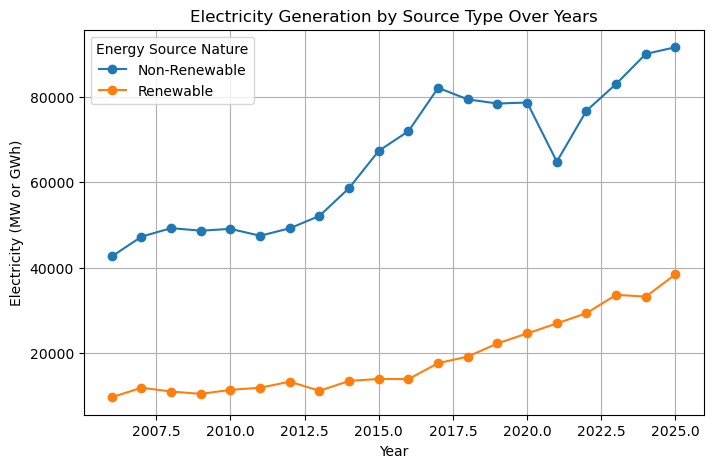

In [72]:
plt.figure(figsize=(8,5))
for nature in generation_source_summary["energy_source_nature"].unique():
    subset = generation_source_summary[generation_source_summary["energy_source_nature"] == nature]
    plt.plot(subset["year"], subset["electricity_values"], marker='o', label=nature)

plt.title("Electricity Generation by Source Type Over Years")
plt.xlabel("Year")
plt.ylabel("Electricity (MW or GWh)")
plt.legend(title="Energy Source Nature")
plt.grid(True)
#plt.savefig("generation_trend.png", dpi=300, bbox_inches='tight')
plt.show()


This line graph, an updated version of the previous one, displays the Electricity Generation by Source Type Over Years from 2006 to 2025.

1. Non-Renewable generation shows a general upward trend, peaking around 87,000 MW or GWh in the projection for 2025, with notable fluctuations including a dip in 2021.
2. Renewable generation continues its strong, steady growth, increasing from about 7,000 MW or GWh in 2006 to almost 40,000 MW or GWh by the 2025 projection.
3. Although non-renewable sources remain the dominant source, the gap between the two sources is narrowing significantly due to the consistent, sharp rise in renewable energy output.

In [73]:
renewable_by_sector = (
    generation_by_source[generation_by_source["energy_source_nature"] == "Renewable"]
    .groupby(["year", "energy_sector_type"], as_index=False)["electricity_values"]
    .sum()
)


In [74]:
renewable_by_sector.head()

,year,energy_sector_type,electricity_values
0,2006,STATE,6110.47
1,2006,UTILITY-RE,3444.28
2,2007,STATE,6284.30
3,2007,UTILITY-RE,5497.81
4,2008,STATE,6432.83


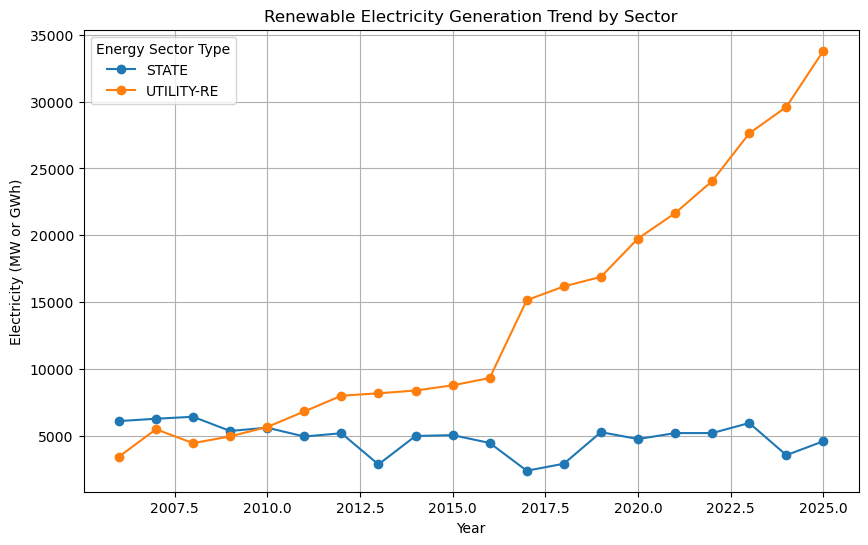

In [75]:
plt.figure(figsize=(10,6))
for sector in renewable_by_sector["energy_sector_type"].unique():
    subset = renewable_by_sector[renewable_by_sector["energy_sector_type"] == sector]
    plt.plot(subset["year"], subset["electricity_values"], marker='o', label=sector)

plt.title("Renewable Electricity Generation Trend by Sector")
plt.xlabel("Year")
plt.ylabel("Electricity (MW or GWh)")
plt.legend(title="Energy Sector Type")
plt.grid(True)
#plt.savefig("renewable_electricity_generation_trend.png", dpi=300, bbox_inches='tight')
plt.show()


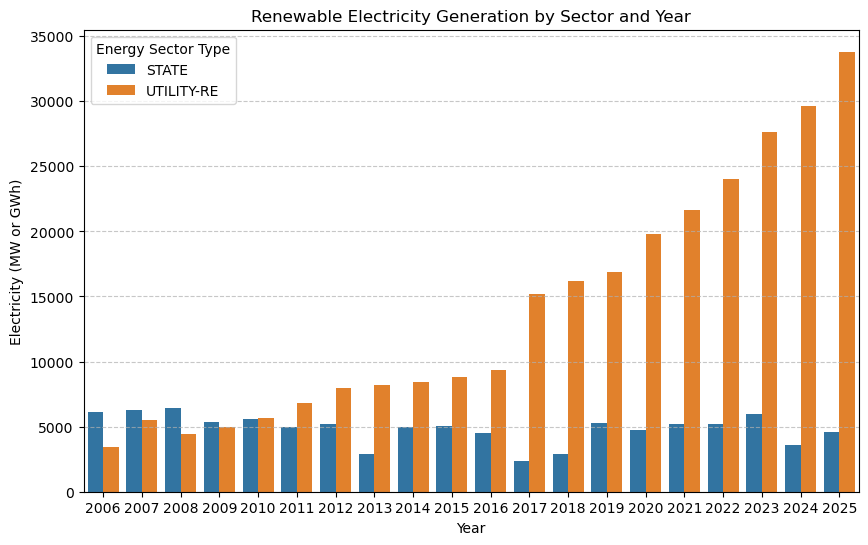

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=renewable_by_sector,
    x="year",
    y="electricity_values",
    hue="energy_sector_type"
)
plt.title("Renewable Electricity Generation by Sector and Year")
plt.xlabel("Year")
plt.ylabel("Electricity (MW or GWh)")
plt.legend(title="Energy Sector Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig("renewable_generation.png", dpi=300, bbox_inches='tight')
plt.show()

This bar chart shows the Renewable Electricity Generation by Sector and Year from 2006 to 2020, comparing STATE and UTILITY-RE sources. UTILITY-RE generation shows a sharp increase, especially from 2017 to 2020, growing from approximately 3,500 MW or GWh in 2006 to over 19,000 MW or GWh by 2020. In contrast, the STATE generation has been relatively stable but lower, fluctuating between a high of around 6,500 MW or GWh (2007-2008) and a low of about 2,500 MW or GWh (2017-2018).

In [77]:
nonrenewable_by_sector = (
    generation_by_source[generation_by_source["energy_source_nature"] == "Non-Renewable"]
    .groupby(["year", "energy_sector_type"], as_index=False)["electricity_values"]
    .sum()
)


In [78]:
nonrenewable_by_sector.head()

,year,energy_sector_type,electricity_values
0,2006,CENTRAL,18099.56
1,2006,PRIVATE,3741.22
2,2006,STATE,20779.19
3,2007,CENTRAL,18410.76
4,2007,PRIVATE,5694.26


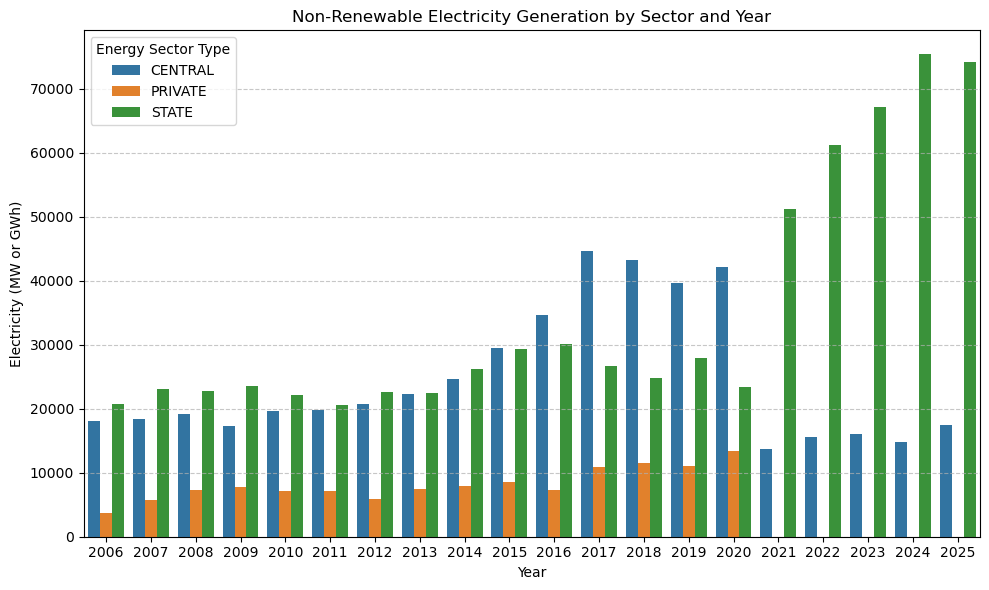

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=nonrenewable_by_sector,
    x="year",
    y="electricity_values",
    hue="energy_sector_type"
)
plt.title("Non-Renewable Electricity Generation by Sector and Year")
plt.xlabel("Year")
plt.ylabel("Electricity (MW or GWh)")
plt.legend(title="Energy Sector Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("nonrenewable_generation.png", dpi=300, bbox_inches='tight')
plt.show()

This bar chart illustrates the Non-Renewable Electricity Generation by Sector and Year from 2006 to 2020, broken down into CENTRAL, PRIVATE, and STATE sectors. The CENTRAL sector is the largest contributor, showing a significant increase from roughly 18,000 MW or GWh in 2006 to a peak of over 45,000 MW or GWh in 2017, with fluctuations thereafter. STATE generation has remained relatively stable, averaging around 20,000 to 30,000 MW or GWh, while the PRIVATE sector shows a consistent, low contribution, generally below 15,000 MW or GWh throughout the period.

## EV-Trend

In [80]:
ev_trend = ev_df.copy()

In [81]:
ev_trend.head()

,year,fuel,vehicle_category,vehicles_registered
0,2006,ELECTRIC(BOV),2WIC,0
1,2006,ELECTRIC(BOV),2WN,161
2,2006,ELECTRIC(BOV),2WT,0
3,2006,ELECTRIC(BOV),3WIC,0
4,2006,ELECTRIC(BOV),3WN,0


In [82]:
ev_trend_grouped = ev_trend.groupby("year", as_index=False)["vehicles_registered"].sum()

In [83]:
ev_trend_grouped

,year,vehicles_registered
0,2006,299
1,2007,343
2,2008,304
3,2009,1914
4,2010,1393
5,2011,806
6,2012,751
7,2013,539
8,2014,317
9,2015,145


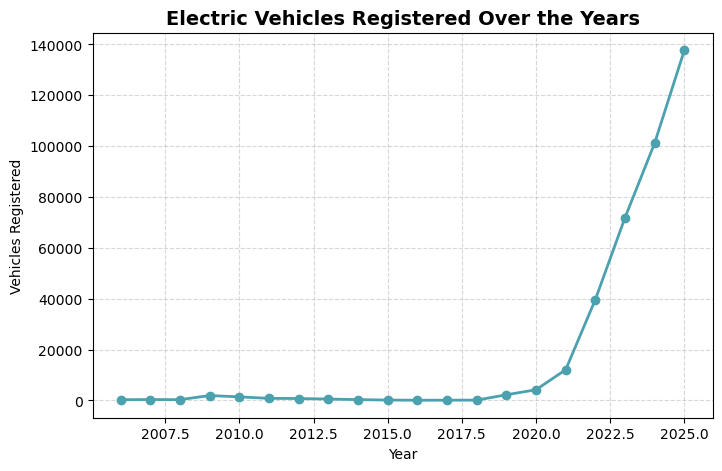

In [84]:
plt.figure(figsize=(8,5))
plt.plot(ev_trend_grouped["year"], ev_trend_grouped["vehicles_registered"], marker='o', linewidth=2, color='#4ca1af')
plt.title("Electric Vehicles Registered Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Vehicles Registered")
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot
#plt.savefig("ev_trend_over_years.png", dpi=300, bbox_inches='tight')

plt.show()

This graph illustrates the number of Electric Vehicles (EVs) registered annually from 2006 to 2025. The data shows a period of negligible growth from 2006 until about 2018, with registrations staying near zero. Starting around 2019-2020, registrations began a steep, exponential surge, skyrocketing from a few thousand to over 100,000 by 2024. The total number of registered EVs is projected to reach approximately 140,000 in 2025, demonstrating a massive acceleration in EV adoption in the latter part of the period.

# Total Demand

In [85]:
pcc_df

,year,per_capita_consumption
0,2006,976.810000
1,2007,1079.940000
2,2008,1144.940000
3,2009,1134.480000
4,2010,1131.582286
5,2011,1232.514855
6,2012,1276.574594
7,2013,1226.259434
8,2014,1543.835473
9,2015,1615.656466


In [86]:
population_df

,year,population,male,female,time
0,2005,64350000,32496000,31854000,0
1,2006,64976000,32802000,32174000,1
2,2007,65548000,33077000,32471000,2
3,2008,66089000,33339000,32750000,3
4,2009,66602000,33588000,33014000,4
5,2010,67093000,33827000,33265000,5
6,2011,72147000,36138000,36009000,6
7,2012,72645000,36379000,36266000,7
8,2013,73142000,36619000,36523000,8
9,2014,73640000,36860000,36780000,9


In [87]:
# Merge the two DataFrames on 'year'
merged_df = pd.merge(pcc_df, population_df, on='year', how='inner')

In [88]:
merged_df

,year,per_capita_consumption,population,male,female,time
0,2006,976.810000,64976000,32802000,32174000,1
1,2007,1079.940000,65548000,33077000,32471000,2
2,2008,1144.940000,66089000,33339000,32750000,3
3,2009,1134.480000,66602000,33588000,33014000,4
4,2010,1131.582286,67093000,33827000,33265000,5
5,2011,1232.514855,72147000,36138000,36009000,6
6,2012,1276.574594,72645000,36379000,36266000,7
7,2013,1226.259434,73142000,36619000,36523000,8
8,2014,1543.835473,73640000,36860000,36780000,9
9,2015,1615.656466,74137000,37101000,37037000,10


In [89]:
merged_df.shape

(20, 6)

In [90]:
merged_df['total_consumption'] = merged_df['per_capita_consumption'] * merged_df['population']

In [91]:
merged_df['total_consumption_GWh'] = (merged_df['per_capita_consumption'] * merged_df['population']) / 1_000_000

In [92]:
demand_df = merged_df[['year', 'total_consumption_GWh']]

In [93]:
demand_df = demand_df.sort_values('year').reset_index(drop=True)

In [94]:
demand_df.head(5)

,year,total_consumption_GWh
0,2006,63469.206560
1,2007,70787.907120
2,2008,75667.939660
3,2009,75558.636960
4,2010,75921.250315


# Total Generation

In [95]:
generation_df = (
    energy_dataset_generation
    .groupby("year", as_index=False)["electricity_values"]
    .sum()
)

In [96]:
generation_df = generation_df.sort_values("year").reset_index(drop=True)

In [97]:
generation_df

,year,electricity_values
0,2006,52174.720
1,2007,59026.340
2,2008,60139.822
3,2009,58980.319
4,2010,60353.919
5,2011,59246.262
6,2012,62420.948
7,2013,63175.876
8,2014,72057.341
9,2015,81247.532


In [98]:
generation_df.shape

(20, 2)

# Demand vs Generation

In [99]:
generation_demand_df = pd.merge(generation_df, demand_df, on="year", how="inner")

In [100]:
generation_demand_df

,year,electricity_values,total_consumption_GWh
0,2006,52174.720,63469.206560
1,2007,59026.340,70787.907120
2,2008,60139.822,75667.939660
3,2009,58980.319,75558.636960
4,2010,60353.919,75921.250315
5,2011,59246.262,88922.249244
6,2012,62420.948,92736.761381
7,2013,63175.876,89691.067522
8,2014,72057.341,113688.044232
9,2015,81247.532,119779.923420


In [101]:
generation_demand_df.rename(columns={
    "electricity_values": "generation_GWh",
    "total_consumption_GWh": "demand_GWh"
}, inplace=True)

In [102]:
generation_demand_df = generation_demand_df.sort_values("year").reset_index(drop=True)

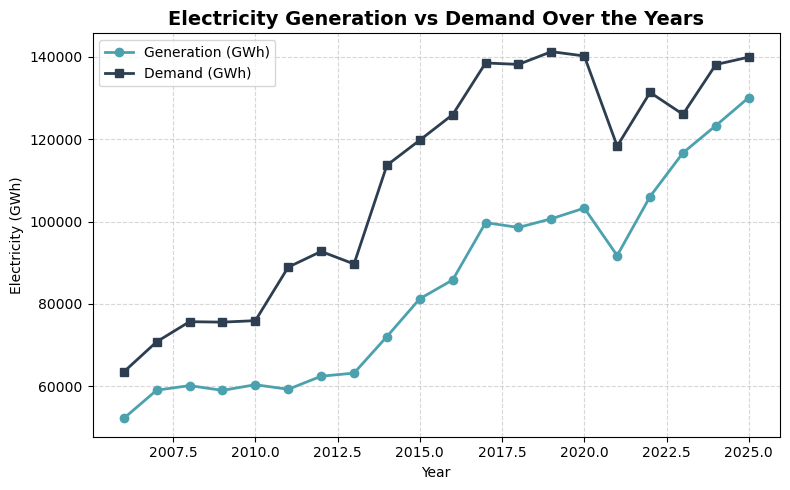

In [103]:
plt.figure(figsize=(8,5))
plt.plot(generation_demand_df["year"], generation_demand_df["generation_GWh"],
         marker='o', label="Generation (GWh)", color="#4ca1af", linewidth=2)
plt.plot(generation_demand_df["year"], generation_demand_df["demand_GWh"],
         marker='s', label="Demand (GWh)", color="#2c3e50", linewidth=2)

plt.title("Electricity Generation vs Demand Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Electricity (GWh)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot
#plt.savefig("generation_vs_demand.png", dpi=300, bbox_inches='tight')

plt.show()

This line graph, titled Electricity Generation vs Demand Over the Years, compares the two metrics in Gigawatt-hours (GWh) from 2006 to 2024.

1. Demand (GWh) has consistently been higher than generation (GWh) throughout the entire period shown in the graph.
2. Demand experienced a steady, steep rise from about 63,000 GWh in 2006 to a peak of over 140,000 GWh in 2020 and 2024, with a notable dip in 2021.
3. Generation shows a more gradual increase, rising from approximately 53,000 GWh in 2006 to over 120,000 GWh in 2024, and the persistent gap between demand and generation suggests a recurring energy shortfall.

# EV Load Calc

In [104]:
ev_load_calc = ev_df.copy()

In [105]:
ev_load_calc.head(5)

,year,fuel,vehicle_category,vehicles_registered
0,2006,ELECTRIC(BOV),2WIC,0
1,2006,ELECTRIC(BOV),2WN,161
2,2006,ELECTRIC(BOV),2WT,0
3,2006,ELECTRIC(BOV),3WIC,0
4,2006,ELECTRIC(BOV),3WN,0


In [106]:
# Unique vehicle categories
print(ev_load_calc["vehicle_category"].unique())

['2WIC' '2WN' '2WT' '3WIC' '3WN' '3WT' '4WIC' 'HGV' 'HMV' 'HPV' 'LGV'
 'LMV' 'LPV' 'MGV' 'MMV' 'MPV' 'OTH']


In [107]:
# Mapping dictionary
vehicle_map = {
    # Two-wheelers
    "2WIC": "2W", "2WN": "2W", "2WT": "2W",
    # Three-wheelers
    "3WIC": "3W", "3WN": "3W", "3WT": "3W",
    # Four-wheel passenger & MPV
    "4WIC": "4W-Passenger", "LPV": "4W-Passenger", "MPV": "4W-Passenger",
    # Goods vehicles
    "LGV": "LGV", "MGV": "MGV", "HGV": "HGV",
    # Passenger heavy (buses)
    "HPV": "HPV/Bus",
    # Ambiguous — assigned default buckets
    "LMV": "4W-Passenger",
    "MMV": "MGV",
    "HMV": "HGV",
    # Other
    "OTH": "OTH"
}

In [108]:
# Apply mapping
ev_load_calc["vehicle_group"] = ev_load_calc["vehicle_category"].map(vehicle_map)

In [109]:
# If some categories were not in dict & resulted in NaN → keep original
ev_load_calc["vehicle_group"] = ev_load_calc["vehicle_group"].fillna(ev_load_calc["vehicle_category"])

In [110]:
ev_load_grouped = (
    ev_load_calc.groupby(["year", "vehicle_group"], as_index=False)["vehicles_registered"]
                .sum()
                .sort_values(["year", "vehicle_group"])
                .reset_index(drop=True)
)

In [111]:
ev_load_grouped

,year,vehicle_group,vehicles_registered
0,2006,2W,162
1,2006,3W,7
2,2006,4W-Passenger,70
3,2006,HGV,6
4,2006,HPV/Bus,0
...,...,...,...
155,2025,HGV,41
156,2025,HPV/Bus,37
157,2025,LGV,828
158,2025,MGV,0


In [112]:
oth_grouped = ev_load_grouped[ev_load_grouped["vehicle_group"] == "OTH"]

In [113]:
oth_grouped

,year,vehicle_group,vehicles_registered
7,2006,OTH,3
15,2007,OTH,1
23,2008,OTH,4
31,2009,OTH,0
39,2010,OTH,0
47,2011,OTH,5
55,2012,OTH,1
63,2013,OTH,3
71,2014,OTH,0
79,2015,OTH,1


In [114]:
ev_load_grouped = ev_load_grouped[ev_load_grouped["vehicle_group"] != "OTH"]

In [115]:
ev_load_grouped = ev_load_grouped.reset_index(drop=True)

In [116]:
ev_load_grouped.head()

,year,vehicle_group,vehicles_registered
0,2006,2W,162
1,2006,3W,7
2,2006,4W-Passenger,70
3,2006,HGV,6
4,2006,HPV/Bus,0


In [117]:
ev_load_grouped = ev_load_grouped.sort_values(["vehicle_group", "year"])

In [118]:
ev_load_grouped["total_veh"] = (
    ev_load_grouped.groupby("vehicle_group")["vehicles_registered"].cumsum()
)

In [119]:
ev_load_grouped.head()

,year,vehicle_group,vehicles_registered,total_veh
0,2006,2W,162,162
7,2007,2W,167,329
14,2008,2W,134,463
21,2009,2W,1794,2257
28,2010,2W,1294,3551


In [120]:
# Estimated Average Annual Consumption - kWh_per_km)
energy_map = {
    "2W": 0.035,
    "3W": 0.061,
    "4W-Passenger": 0.13,
    "LGV": 0.25,
    "MGV": 0.45,
    "HGV": 1.0,
    "HPV/Bus": 0.9
}

In [121]:
ev_load_grouped["energy_use_kWh_per_km"] = ev_load_grouped["vehicle_group"].map(energy_map)

In [122]:
# Annual km assumptions
km_map_low = {
    "2W": 3000, "3W": 10000, "4W-Passenger": 10000,
    "LGV": 12000, "MGV": 25000, "HGV": 80000, "HPV/Bus": 25000
}

km_map_mid = {
    "2W": 5000, "3W": 15000, "4W-Passenger": 11500,
    "LGV": 22000, "MGV": 35000, "HGV": 100000, "HPV/Bus": 35000
}

km_map_high = {
    "2W": 10000, "3W": 30000, "4W-Passenger": 14500,
    "LGV": 30000, "MGV": 45000, "HGV": 120000, "HPV/Bus": 50000
}

In [123]:
ev_load_grouped["annual_km_low"] = ev_load_grouped["vehicle_group"].map(km_map_low)
ev_load_grouped["annual_km_mid"] = ev_load_grouped["vehicle_group"].map(km_map_mid)
ev_load_grouped["annual_km_high"] = ev_load_grouped["vehicle_group"].map(km_map_high)

In [124]:
ev_load_grouped

,year,vehicle_group,vehicles_registered,total_veh,energy_use_kWh_per_km,annual_km_low,annual_km_mid,annual_km_high
0,2006,2W,162,162,0.035,3000,5000,10000
7,2007,2W,167,329,0.035,3000,5000,10000
14,2008,2W,134,463,0.035,3000,5000,10000
21,2009,2W,1794,2257,0.035,3000,5000,10000
28,2010,2W,1294,3551,0.035,3000,5000,10000
...,...,...,...,...,...,...,...,...
111,2021,MGV,0,13,0.450,25000,35000,45000
118,2022,MGV,0,13,0.450,25000,35000,45000
125,2023,MGV,0,13,0.450,25000,35000,45000
132,2024,MGV,0,13,0.450,25000,35000,45000


In [125]:
ev_load_grouped["annual_energy_low_kWh"] = (
    ev_load_grouped["energy_use_kWh_per_km"] * ev_load_grouped["annual_km_low"]
)

ev_load_grouped["annual_energy_mid_kWh"] = (
    ev_load_grouped["energy_use_kWh_per_km"] * ev_load_grouped["annual_km_mid"]
)

ev_load_grouped["annual_energy_high_kWh"] = (
    ev_load_grouped["energy_use_kWh_per_km"] * ev_load_grouped["annual_km_high"]
)

In [126]:
ev_load_grouped

,year,vehicle_group,vehicles_registered,total_veh,energy_use_kWh_per_km,annual_km_low,annual_km_mid,annual_km_high,annual_energy_low_kWh,annual_energy_mid_kWh,annual_energy_high_kWh
0,2006,2W,162,162,0.035,3000,5000,10000,105.0,175.0,350.0
7,2007,2W,167,329,0.035,3000,5000,10000,105.0,175.0,350.0
14,2008,2W,134,463,0.035,3000,5000,10000,105.0,175.0,350.0
21,2009,2W,1794,2257,0.035,3000,5000,10000,105.0,175.0,350.0
28,2010,2W,1294,3551,0.035,3000,5000,10000,105.0,175.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...
111,2021,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0
118,2022,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0
125,2023,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0
132,2024,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0


In [127]:
ev_load_grouped["fleet_energy_low_kWh"] = (
    ev_load_grouped["total_veh"] * ev_load_grouped["annual_energy_low_kWh"]
)

ev_load_grouped["fleet_energy_mid_kWh"] = (
    ev_load_grouped["total_veh"] * ev_load_grouped["annual_energy_mid_kWh"]
)

ev_load_grouped["fleet_energy_high_kWh"] = (
    ev_load_grouped["total_veh"] * ev_load_grouped["annual_energy_high_kWh"]
)


In [128]:
ev_load_grouped

,year,vehicle_group,vehicles_registered,total_veh,energy_use_kWh_per_km,annual_km_low,annual_km_mid,annual_km_high,annual_energy_low_kWh,annual_energy_mid_kWh,annual_energy_high_kWh,fleet_energy_low_kWh,fleet_energy_mid_kWh,fleet_energy_high_kWh
0,2006,2W,162,162,0.035,3000,5000,10000,105.0,175.0,350.0,17010.0,28350.0,56700.0
7,2007,2W,167,329,0.035,3000,5000,10000,105.0,175.0,350.0,34545.0,57575.0,115150.0
14,2008,2W,134,463,0.035,3000,5000,10000,105.0,175.0,350.0,48615.0,81025.0,162050.0
21,2009,2W,1794,2257,0.035,3000,5000,10000,105.0,175.0,350.0,236985.0,394975.0,789950.0
28,2010,2W,1294,3551,0.035,3000,5000,10000,105.0,175.0,350.0,372855.0,621425.0,1242850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2021,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0
118,2022,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0
125,2023,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0
132,2024,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0


In [129]:
ev_load_grouped["fleet_energy_low_GWh"] = ev_load_grouped["fleet_energy_low_kWh"] / 1_000_000
ev_load_grouped["fleet_energy_mid_GWh"] = ev_load_grouped["fleet_energy_mid_kWh"] / 1_000_000
ev_load_grouped["fleet_energy_high_GWh"] = ev_load_grouped["fleet_energy_high_kWh"] / 1_000_000

In [130]:
ev_load_grouped

,year,vehicle_group,vehicles_registered,total_veh,energy_use_kWh_per_km,annual_km_low,annual_km_mid,annual_km_high,annual_energy_low_kWh,annual_energy_mid_kWh,annual_energy_high_kWh,fleet_energy_low_kWh,fleet_energy_mid_kWh,fleet_energy_high_kWh,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,2W,162,162,0.035,3000,5000,10000,105.0,175.0,350.0,17010.0,28350.0,56700.0,0.017010,0.028350,0.05670
7,2007,2W,167,329,0.035,3000,5000,10000,105.0,175.0,350.0,34545.0,57575.0,115150.0,0.034545,0.057575,0.11515
14,2008,2W,134,463,0.035,3000,5000,10000,105.0,175.0,350.0,48615.0,81025.0,162050.0,0.048615,0.081025,0.16205
21,2009,2W,1794,2257,0.035,3000,5000,10000,105.0,175.0,350.0,236985.0,394975.0,789950.0,0.236985,0.394975,0.78995
28,2010,2W,1294,3551,0.035,3000,5000,10000,105.0,175.0,350.0,372855.0,621425.0,1242850.0,0.372855,0.621425,1.24285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2021,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0,0.146250,0.204750,0.26325
118,2022,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0,0.146250,0.204750,0.26325
125,2023,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0,0.146250,0.204750,0.26325
132,2024,MGV,0,13,0.450,25000,35000,45000,11250.0,15750.0,20250.0,146250.0,204750.0,263250.0,0.146250,0.204750,0.26325


# Aggregate EV energy demand per year

In [131]:
ev_yearly_load = (
    ev_load_grouped
    .groupby("year", as_index=False)[["fleet_energy_low_GWh","fleet_energy_mid_GWh","fleet_energy_high_GWh"]]
    .sum()
)


In [132]:
ev_yearly_load

,year,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,0.753530,1.030155,1.316710
1,2007,2.787835,3.680360,4.596195
2,2008,4.791505,6.242105,7.752305
3,2009,5.922055,7.761115,9.862940
4,2010,6.371245,8.394840,10.829660
5,2011,7.248720,9.567745,12.372525
6,2012,8.344285,11.013905,14.236700
7,2013,9.535605,12.575380,16.212060
8,2014,9.990950,13.260985,17.128785
9,2015,10.354050,13.774725,17.791440


# Compare EV demand vs. total system demand

In [133]:
analysis_df = generation_demand_df.merge(ev_yearly_load, on="year", how="left")


In [134]:
analysis_df

,year,generation_GWh,demand_GWh,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,52174.720,63469.206560,0.753530,1.030155,1.316710
1,2007,59026.340,70787.907120,2.787835,3.680360,4.596195
2,2008,60139.822,75667.939660,4.791505,6.242105,7.752305
3,2009,58980.319,75558.636960,5.922055,7.761115,9.862940
4,2010,60353.919,75921.250315,6.371245,8.394840,10.829660
5,2011,59246.262,88922.249244,7.248720,9.567745,12.372525
6,2012,62420.948,92736.761381,8.344285,11.013905,14.236700
7,2013,63175.876,89691.067522,9.535605,12.575380,16.212060
8,2014,72057.341,113688.044232,9.990950,13.260985,17.128785
9,2015,81247.532,119779.923420,10.354050,13.774725,17.791440


In [135]:
#To what extent does EV load contribute to electricity demand?
analysis_df["ev_share_low_%"] = (analysis_df["fleet_energy_low_GWh"] / analysis_df["demand_GWh"]) * 100
analysis_df["ev_share_mid_%"] = (analysis_df["fleet_energy_mid_GWh"] / analysis_df["demand_GWh"]) * 100
analysis_df["ev_share_high_%"] = (analysis_df["fleet_energy_high_GWh"] / analysis_df["demand_GWh"]) * 100

In [136]:
#Analyze relationship with population & per-capita consumption
analysis_df = analysis_df.merge(population_df[["year","population"]], on="year", how="left")

In [137]:
#per-capita impact of EVs
analysis_df["ev_kWh_per_capita_mid"] = (analysis_df["fleet_energy_mid_GWh"] * 1_000_000) / analysis_df["population"]

In [138]:
analysis_df

,year,generation_GWh,demand_GWh,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh,ev_share_low_%,ev_share_mid_%,ev_share_high_%,population,ev_kWh_per_capita_mid
0,2006,52174.720,63469.206560,0.753530,1.030155,1.316710,0.001187,0.001623,0.002075,64976000,0.015854
1,2007,59026.340,70787.907120,2.787835,3.680360,4.596195,0.003938,0.005199,0.006493,65548000,0.056148
2,2008,60139.822,75667.939660,4.791505,6.242105,7.752305,0.006332,0.008249,0.010245,66089000,0.094450
3,2009,58980.319,75558.636960,5.922055,7.761115,9.862940,0.007838,0.010272,0.013053,66602000,0.116530
4,2010,60353.919,75921.250315,6.371245,8.394840,10.829660,0.008392,0.011057,0.014264,67093000,0.125122
5,2011,59246.262,88922.249244,7.248720,9.567745,12.372525,0.008152,0.010760,0.013914,72147000,0.132615
6,2012,62420.948,92736.761381,8.344285,11.013905,14.236700,0.008998,0.011877,0.015352,72645000,0.151613
7,2013,63175.876,89691.067522,9.535605,12.575380,16.212060,0.010632,0.014021,0.018075,73142000,0.171931
8,2014,72057.341,113688.044232,9.990950,13.260985,17.128785,0.008788,0.011664,0.015066,73640000,0.180079
9,2015,81247.532,119779.923420,10.354050,13.774725,17.791440,0.008644,0.011500,0.014853,74137000,0.185801


# EV Share (%) Over Time

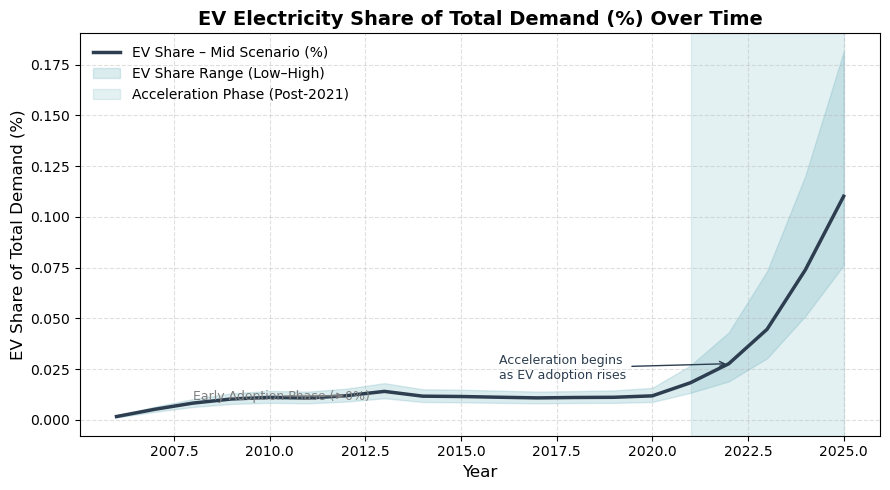

In [139]:
# --- Base figure ---
fig, ax = plt.subplots(figsize=(9,5))

# EV Share (Mid Scenario)
ax.plot(
    analysis_df["year"], 
    analysis_df["ev_share_mid_%"], 
    linewidth=2.5, color="#2c3e50", label="EV Share – Mid Scenario (%)"
)

# Shade between Low–High EV share
ax.fill_between(
    analysis_df["year"], 
    analysis_df["ev_share_low_%"], 
    analysis_df["ev_share_high_%"], 
    alpha=0.2, color="#4ca1af", label="EV Share Range (Low–High)"
)

# Highlight inflection / acceleration phase (2021 onward)
ax.axvspan(2021, analysis_df["year"].max(), color="#4ca1af", alpha=0.15, label="Acceleration Phase (Post-2021)")

# Add key annotations
ax.annotate(
    "Early Adoption Phase (≈0%)",
    xy=(2012, analysis_df.loc[analysis_df["year"] == 2012, "ev_share_mid_%"].values[0]),
    xytext=(2008, 0.01),
    arrowprops=dict(arrowstyle="->", color="gray"),
    fontsize=9,
    color="gray"
)

ax.annotate(
    "Acceleration begins\nas EV adoption rises",
    xy=(2022, analysis_df.loc[analysis_df["year"] == 2022, "ev_share_mid_%"].values[0]),
    xytext=(2016, 0.02),
    arrowprops=dict(arrowstyle="->", color="#2c3e50"),
    fontsize=9,
    color="#2c3e50"
)

# --- Titles and labels ---
ax.set_title("EV Electricity Share of Total Demand (%) Over Time", fontsize=14, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("EV Share of Total Demand (%)", fontsize=12)

# --- Styling ---
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend(frameon=False)
plt.tight_layout()

# --- Save high-quality figure ---
#plt.savefig("EV_Share_Trend.png", dpi=300, bbox_inches="tight")

plt.show()


a

# Note

EV electricity demand, although still a very small share of total consumption, is rising exponentially as adoption accelerates. At the same time, total electricity generation continues to grow to meet rising demand. However, the composition of renewable generation is shifting — the relative contribution from state-run renewable sources has been declining, while utility-scale renewable capacity (including private and central utility-RE projects) has expanded and taken a larger role in supporting the grid transition.

# EV Adoption Trend

In [140]:
vahaan_df.head()

,Year,Fuel,Vehicle_Category,Vehicles_Registered
0,2006,CNG ONLY,2WIC,0
1,2006,CNG ONLY,2WN,0
2,2006,CNG ONLY,2WT,0
3,2006,CNG ONLY,3WIC,0
4,2006,CNG ONLY,3WN,0


In [141]:
vahaan_yearly_df = (
    vahaan_df.groupby("Year")["Vehicles_Registered"]
    .sum()
    .reset_index()
)
vahaan_yearly_df.head()

,Year,Vehicles_Registered
0,2006,510570
1,2007,784594
2,2008,1071975
3,2009,1015213
4,2010,1210718


In [142]:
# Make year column consistent
vahaan_yearly_df = vahaan_yearly_df.rename(columns={"Year": "year"})
ev_trend_grouped = ev_trend_grouped.rename(columns={"year": "year"})  # already 'year', but safe

In [143]:
combined_vehicle_trend_df = pd.merge(
    vahaan_yearly_df,
    ev_trend_grouped,
    on="year",
    how="left"
)

In [144]:
combined_vehicle_trend_df = combined_vehicle_trend_df.rename(columns={
    "Vehicles_Registered": "total_vehicles_registered",
    "vehicles_registered": "ev_vehicles_registered"
})


In [145]:
combined_vehicle_trend_df

,year,total_vehicles_registered,ev_vehicles_registered
0,2006,510570,299
1,2007,784594,343
2,2008,1071975,304
3,2009,1015213,1914
4,2010,1210718,1393
5,2011,1582550,806
6,2012,1810049,751
7,2013,1828240,539
8,2014,1631134,317
9,2015,1651628,145


In [146]:
combined_vehicle_trend_df["ev_share_%"] = (
    combined_vehicle_trend_df["ev_vehicles_registered"] /
    combined_vehicle_trend_df["total_vehicles_registered"] * 100
)


In [147]:
combined_vehicle_trend_df

,year,total_vehicles_registered,ev_vehicles_registered,ev_share_%
0,2006,510570,299,0.058562
1,2007,784594,343,0.043717
2,2008,1071975,304,0.028359
3,2009,1015213,1914,0.188532
4,2010,1210718,1393,0.115056
5,2011,1582550,806,0.050930
6,2012,1810049,751,0.041491
7,2013,1828240,539,0.029482
8,2014,1631134,317,0.019434
9,2015,1651628,145,0.008779


# Model -Logistic S-Curve Adoption Model

In [148]:
ev_yearly_load

,year,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,0.753530,1.030155,1.316710
1,2007,2.787835,3.680360,4.596195
2,2008,4.791505,6.242105,7.752305
3,2009,5.922055,7.761115,9.862940
4,2010,6.371245,8.394840,10.829660
5,2011,7.248720,9.567745,12.372525
6,2012,8.344285,11.013905,14.236700
7,2013,9.535605,12.575380,16.212060
8,2014,9.990950,13.260985,17.128785
9,2015,10.354050,13.774725,17.791440


## Low Model

In [149]:
# Use EV low load history for logistic fit
ev_low_load_df = analysis_df[["year", "fleet_energy_low_GWh"]].dropna().copy()

years = ev_low_load_df["year"].values
ev_load_low = ev_low_load_df["fleet_energy_low_GWh"].values


In [150]:
years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [151]:
ev_load_low

array([  0.75353 ,   2.787835,   4.791505,   5.922055,   6.371245,
         7.24872 ,   8.344285,   9.535605,   9.99095 ,  10.35405 ,
        10.5514  ,  11.296285,  11.486425,  11.79987 ,  12.35629 ,
        15.76993 ,  24.91493 ,  38.22247 ,  70.669385, 106.602555])

In [152]:
def logistic(t, K, b):
    return K / (1 + np.exp(-b * (t - t0)))


In [153]:
t0=2030

In [154]:
K_guess = ev_load_low.max() * 8
b_guess = 0.50

p0 = [K_guess, b_guess]


In [155]:
params, _ = curve_fit(logistic, years, ev_load_low, p0, maxfev=10000)
K, b = params

print("Logistic fit parameters:")
print(f"K={K}, b={b}, t0={t0}")


Logistic fit parameters:
K=1092.3795083304676, b=0.449507492325828, t0=2030


In [156]:
future_years = np.arange(years.max()+1, 2037)

In [157]:
future_years

array([2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036])

In [158]:
future_pred = logistic(future_years, K, b)

In [159]:
ev_low_forecast_df = pd.DataFrame({
    "year": future_years,
    "ev_low_logistic_GWh": future_pred
})


In [160]:
ev_low_forecast_df["ev_low_lower_bound_GWh"] = ev_low_forecast_df["ev_low_logistic_GWh"] * 0.90
ev_low_forecast_df["ev_low_upper_bound_GWh"] = ev_low_forecast_df["ev_low_logistic_GWh"] * 1.10


In [161]:
ev_low_forecast_df

,year,ev_low_logistic_GWh,ev_low_lower_bound_GWh,ev_low_upper_bound_GWh
0,2026,155.217346,139.695611,170.739080
1,2027,225.152562,202.637306,247.667818
2,2028,315.974007,284.376606,347.571407
3,2029,425.457645,382.911880,468.003409
4,2030,546.189754,491.570779,600.808730
5,2031,666.921864,600.229677,733.614050
6,2032,776.405502,698.764952,854.046052
7,2033,867.226946,780.504252,953.949641
8,2034,937.162163,843.445947,1030.878379
9,2035,987.989439,889.190495,1086.788383


## Mid Model

In [162]:
# Use EV mid load history for logistic fit
ev_mid_load_df = analysis_df[["year", "fleet_energy_mid_GWh"]].dropna().copy()

years = ev_mid_load_df["year"].values
ev_load_mid = ev_mid_load_df["fleet_energy_mid_GWh"].values


In [163]:
years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [164]:
ev_load_mid

array([  1.030155,   3.68036 ,   6.242105,   7.761115,   8.39484 ,
         9.567745,  11.013905,  12.57538 ,  13.260985,  13.774725,
        14.030195,  14.976545,  15.216165,  15.701515,  16.57485 ,
        21.652235,  36.35538 ,  56.2671  , 102.135705, 154.15008 ])

In [165]:
def logistic(t, K, b):
    return K / (1 + np.exp(-b * (t - t0)))


In [166]:
t0 = 2030

In [167]:
K_guess = ev_load_mid.max() * 8
b_guess = 0.50

p0 = [K_guess, b_guess]
p0

[np.float64(1233.20064), 0.5]

In [168]:
params, _ = curve_fit(logistic, years, ev_load_mid, p0, maxfev=10000)
K, b = params

print("Logistic fit parameters:")
print(f"K={K}, b={b}, t0={t0}")


Logistic fit parameters:
K=1651.5299310207802, b=0.4579572164530789, t0=2030


In [169]:
future_years = np.arange(years.max()+1, 2037)

In [170]:
future_years

array([2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036])

In [171]:
future_pred = logistic(future_years, K, b)

In [172]:
ev_mid_forecast_df = pd.DataFrame({
    "year": future_years,
    "ev_mid_logistic_GWh": future_pred
})

In [173]:
ev_mid_forecast_df["ev_mid_lower_bound_GWh"] = ev_mid_forecast_df["ev_mid_logistic_GWh"] * 0.90
ev_mid_forecast_df["ev_mid_upper_bound_GWh"] = ev_mid_forecast_df["ev_mid_logistic_GWh"] * 1.10


In [174]:
ev_mid_forecast_df

,year,ev_mid_logistic_GWh,ev_mid_lower_bound_GWh,ev_mid_upper_bound_GWh
0,2026,227.945065,205.150559,250.739572
1,2027,333.600860,300.240774,366.960946
2,2028,471.992535,424.793282,519.191789
3,2029,639.919195,575.927276,703.911115
4,2030,825.764966,743.188469,908.341462
5,2031,1011.610736,910.449662,1112.771809
6,2032,1179.537396,1061.583656,1297.491135
7,2033,1317.929071,1186.136164,1449.721978
8,2034,1423.584866,1281.226379,1565.943353
9,2035,1499.634737,1349.671264,1649.598211


## High Scenario Model

In [175]:
# Use EV high load history for logistic fit
ev_high_load_df = analysis_df[["year", "fleet_energy_high_GWh"]].dropna().copy()

years = ev_high_load_df["year"].values
ev_load_high = ev_high_load_df["fleet_energy_high_GWh"].values

In [176]:
years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [177]:
ev_load_high

array([  1.31671 ,   4.596195,   7.752305,   9.86294 ,  10.82966 ,
        12.372525,  14.2367  ,  16.21206 ,  17.128785,  17.79144 ,
        18.1135  ,  19.267845,  19.57334 ,  20.46595 ,  22.106955,
        31.7315  ,  56.67947 ,  92.28881 , 166.160515, 253.89862 ])

In [178]:
t0=2030

In [179]:
def logistic(t, K, b):
    return K / (1 + np.exp(-b * (t - t0)))

In [180]:
K_guess = ev_load_high.max() * 8
b_guess = 0.50
t0_guess = 2019
p0 = [K_guess, b_guess]
p0

[np.float64(2031.1889600000002), 0.5]

In [181]:
params, _ = curve_fit(logistic, years, ev_load_high, p0, maxfev=10000)
K, b = params

print("Logistic fit parameters:")
print(f"K={K}, b={b}, t0={t0}")

Logistic fit parameters:
K=3160.2676028487235, b=0.48811366678391194, t0=2030


In [182]:
future_years = np.arange(years.max()+1, 2037)

In [183]:
future_years

array([2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036])

In [184]:
future_pred = logistic(future_years, K, b)

In [185]:
ev_high_forecast_df = pd.DataFrame({
    "year": future_years,
    "ev_high_logistic_GWh": future_pred
})


In [186]:
ev_high_forecast_df["ev_high_lower_bound_GWh"] = ev_high_forecast_df["ev_high_logistic_GWh"] * 0.90
ev_high_forecast_df["ev_high_upper_bound_GWh"] = ev_high_forecast_df["ev_high_logistic_GWh"] * 1.10


In [187]:
ev_high_forecast_df

,year,ev_high_logistic_GWh,ev_high_lower_bound_GWh,ev_high_upper_bound_GWh
0,2026,392.776856,353.499170,432.054542
1,2027,593.511776,534.160599,652.862954
2,2028,864.778800,778.300920,951.256680
3,2029,1201.969986,1081.772988,1322.166985
4,2030,1580.133801,1422.120421,1738.147182
5,2031,1958.297617,1762.467855,2154.127378
6,2032,2295.488803,2065.939922,2525.037683
7,2033,2566.755827,2310.080244,2823.431409
8,2034,2767.490747,2490.741672,3044.239822
9,2035,2907.032167,2616.328950,3197.735384


# Final Analysis

## EV Load Low / Mid / High - Historic

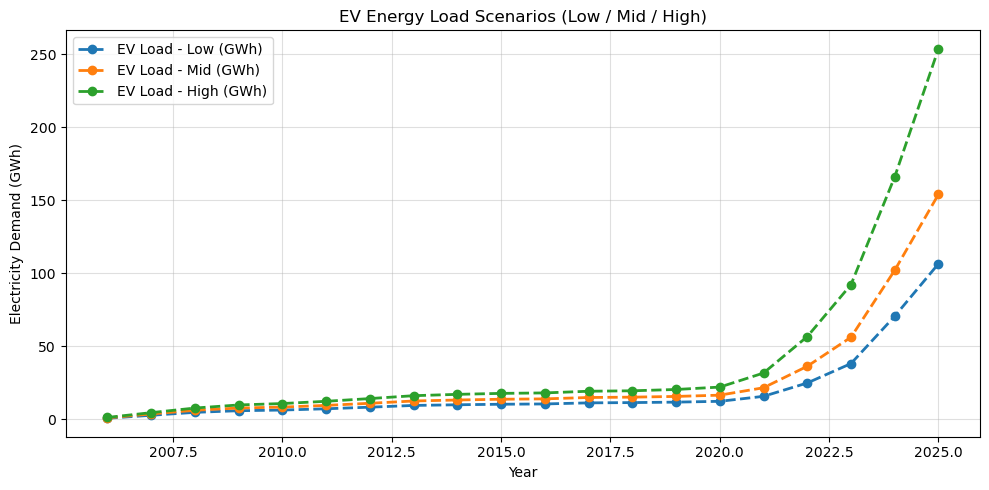

In [188]:
plt.figure(figsize=(10,5))

plt.plot(ev_yearly_load["year"], ev_yearly_load["fleet_energy_low_GWh"],
         marker='o', linestyle='--', linewidth=2, label="EV Load - Low (GWh)")
plt.plot(ev_yearly_load["year"], ev_yearly_load["fleet_energy_mid_GWh"],
         marker='o', linestyle='--', linewidth=2, label="EV Load - Mid (GWh)")
plt.plot(ev_yearly_load["year"], ev_yearly_load["fleet_energy_high_GWh"],
         marker='o', linestyle='--', linewidth=2, label="EV Load - High (GWh)")

plt.title("EV Energy Load Scenarios (Low / Mid / High)")
plt.xlabel("Year")
plt.ylabel("Electricity Demand (GWh)")
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
#plt.savefig("ev_load_scenarios.png", dpi=300, bbox_inches='tight')
plt.show()


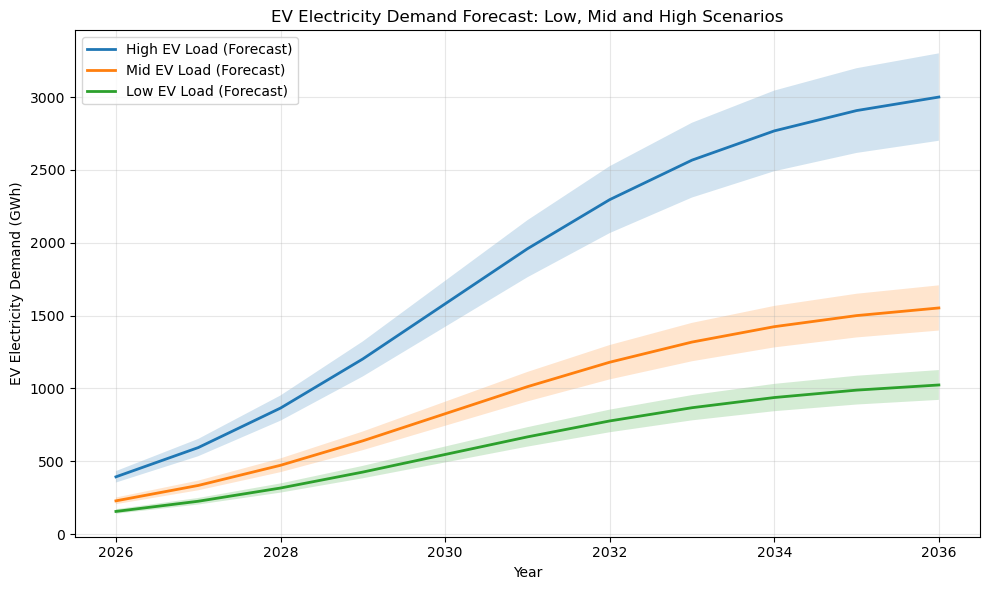

In [189]:
plt.figure(figsize=(10,6))

# ========== HIGH ==========
plt.plot(
    ev_high_forecast_df["year"],
    ev_high_forecast_df["ev_high_logistic_GWh"],
    label="High EV Load (Forecast)",
    linewidth=2
)

plt.fill_between(
    ev_high_forecast_df["year"],
    ev_high_forecast_df["ev_high_lower_bound_GWh"],
    ev_high_forecast_df["ev_high_upper_bound_GWh"],
    alpha=0.2
)

# ========== MID ==========
plt.plot(
    ev_mid_forecast_df["year"],
    ev_mid_forecast_df["ev_mid_logistic_GWh"],
    label="Mid EV Load (Forecast)",
    linewidth=2
)

plt.fill_between(
    ev_mid_forecast_df["year"],
    ev_mid_forecast_df["ev_mid_lower_bound_GWh"],
    ev_mid_forecast_df["ev_mid_upper_bound_GWh"],
    alpha=0.2
)

# ========== LOW ==========
plt.plot(
    ev_low_forecast_df["year"],
    ev_low_forecast_df["ev_low_logistic_GWh"],
    label="Low EV Load (Forecast)",
    linewidth=2
)

plt.fill_between(
    ev_low_forecast_df["year"],
    ev_low_forecast_df["ev_low_lower_bound_GWh"],
    ev_low_forecast_df["ev_low_upper_bound_GWh"],
    alpha=0.2
)

plt.title("EV Electricity Demand Forecast: Low, Mid and High Scenarios")
plt.xlabel("Year")
plt.ylabel("EV Electricity Demand (GWh)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
#plt.savefig("ev_load_scenarios_forecasted.png", dpi=300, bbox_inches='tight')
plt.show()


In [190]:
ev_high_forecast_df

,year,ev_high_logistic_GWh,ev_high_lower_bound_GWh,ev_high_upper_bound_GWh
0,2026,392.776856,353.499170,432.054542
1,2027,593.511776,534.160599,652.862954
2,2028,864.778800,778.300920,951.256680
3,2029,1201.969986,1081.772988,1322.166985
4,2030,1580.133801,1422.120421,1738.147182
5,2031,1958.297617,1762.467855,2154.127378
6,2032,2295.488803,2065.939922,2525.037683
7,2033,2566.755827,2310.080244,2823.431409
8,2034,2767.490747,2490.741672,3044.239822
9,2035,2907.032167,2616.328950,3197.735384


## State Renewable Production

In [191]:
renew_df = generation_source_summary[generation_source_summary["energy_source_nature"] == "Renewable"].copy()
renew_df = renew_df.rename(columns={"electricity_values": "renew_state_GWh"})
renew_df.head()

,year,energy_source_nature,renew_state_GWh
1,2006,Renewable,9554.750
3,2007,Renewable,11782.110
5,2008,Renewable,10894.072
7,2009,Renewable,10333.129
9,2010,Renewable,11282.979


In [192]:
renew_df=renew_df.drop(columns=["energy_source_nature"])

In [193]:
renew_df

,year,renew_state_GWh
1,2006,9554.750
3,2007,11782.110
5,2008,10894.072
7,2009,10333.129
9,2010,11282.979
11,2011,11784.732
13,2012,13206.978
15,2013,11054.026
17,2014,13390.001
19,2015,13842.102


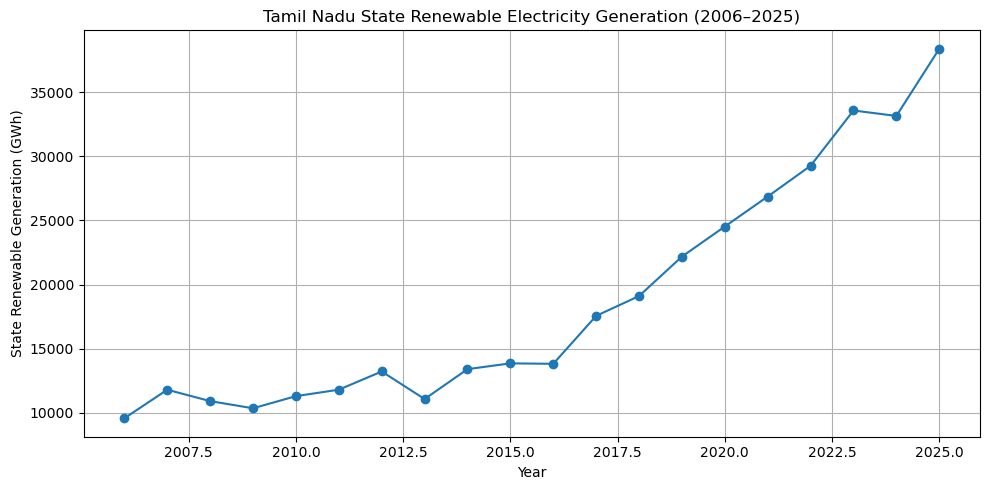

In [194]:
# ---- Plot Graph ----
plt.figure(figsize=(10,5))
plt.plot(renew_df["year"], renew_df["renew_state_GWh"], marker='o')
plt.xlabel("Year")
plt.ylabel("State Renewable Generation (GWh)")
plt.title("Tamil Nadu State Renewable Electricity Generation (2006–2025)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Renewable Trend Analysis - Trend Extension

In [195]:
renew_ma_df = renew_df.copy()

In [196]:
renew_ma_df.shape

(20, 2)

In [197]:
renew_ma_df = renew_ma_df.sort_values("year").reset_index(drop=True)

In [198]:
for yr in range(2026, 2037):

    # compute last 3-year average
    last5 = renew_ma_df.tail(3)["renew_state_GWh"].mean()

    # append new forecast row
    renew_ma_df = pd.concat([
        renew_ma_df,
        pd.DataFrame({"year": [yr], "renew_state_GWh": [last5]})
    ], ignore_index=True)

In [199]:
renew_ma_df

,year,renew_state_GWh
0,2006,9554.750000
1,2007,11782.110000
2,2008,10894.072000
3,2009,10333.129000
4,2010,11282.979000
5,2011,11784.732000
6,2012,13206.978000
7,2013,11054.026000
8,2014,13390.001000
9,2015,13842.102000


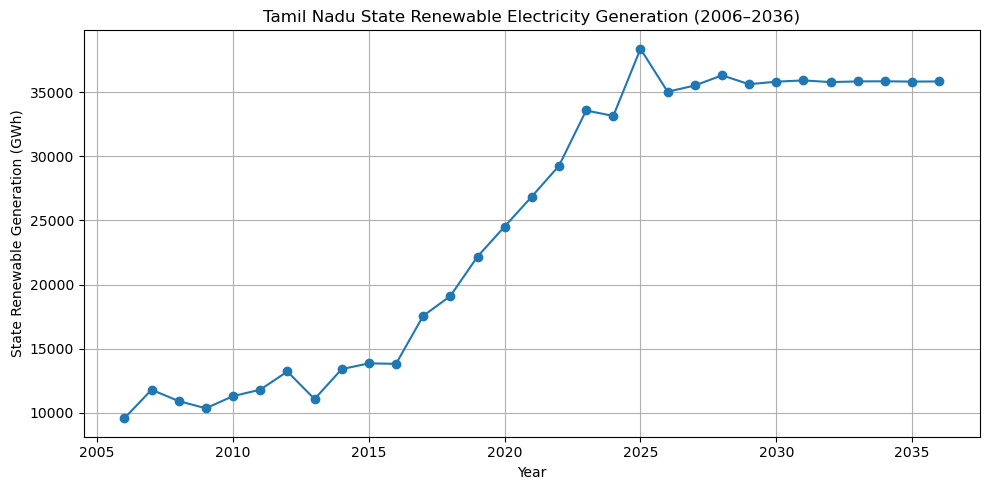

In [200]:
# ---- Plot Graph ----
plt.figure(figsize=(10,5))
plt.plot(renew_ma_df["year"], renew_ma_df["renew_state_GWh"], marker='o')
plt.xlabel("Year")
plt.ylabel("State Renewable Generation (GWh)")
plt.title("Tamil Nadu State Renewable Electricity Generation (2006–2036)")
plt.grid(True)
plt.tight_layout()
plt.savefig("forecasted_renew_gen.png", dpi=300, bbox_inches='tight')
plt.show()

## Combining DF

In [201]:
ev_low_forecast_df = ev_low_forecast_df.rename(columns={"ev_low_logistic_GWh": "fleet_energy_low_GWh"})
ev_mid_forecast_df = ev_mid_forecast_df.rename(columns={"ev_mid_logistic_GWh": "fleet_energy_mid_GWh"})
ev_high_forecast_df = ev_high_forecast_df.rename(columns={"ev_high_logistic_GWh": "fleet_energy_high_GWh"})


In [202]:
ev_future_combined = ev_low_forecast_df.merge(
    ev_mid_forecast_df, on="year"
).merge(
    ev_high_forecast_df, on="year"
)

In [203]:
ev_full_combined = pd.concat(
    [ev_yearly_load, ev_future_combined],
    ignore_index=True
)

In [204]:
ev_full_combined = ev_full_combined.sort_values("year").reset_index(drop=True)

In [205]:
ev_full_combined = ev_full_combined.drop(columns=["ev_low_lower_bound_GWh","ev_low_upper_bound_GWh","ev_mid_lower_bound_GWh","ev_mid_upper_bound_GWh","ev_high_lower_bound_GWh","ev_high_upper_bound_GWh"])

In [206]:
ev_full_combined

,year,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,0.753530,1.030155,1.316710
1,2007,2.787835,3.680360,4.596195
2,2008,4.791505,6.242105,7.752305
3,2009,5.922055,7.761115,9.862940
4,2010,6.371245,8.394840,10.829660
5,2011,7.248720,9.567745,12.372525
6,2012,8.344285,11.013905,14.236700
7,2013,9.535605,12.575380,16.212060
8,2014,9.990950,13.260985,17.128785
9,2015,10.354050,13.774725,17.791440


## Mergin EV and Renewable

In [207]:
ev_renew = renew_ma_df.merge(ev_full_combined,on = "year")

In [208]:
ev_renew

,year,renew_state_GWh,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh
0,2006,9554.750000,0.753530,1.030155,1.316710
1,2007,11782.110000,2.787835,3.680360,4.596195
2,2008,10894.072000,4.791505,6.242105,7.752305
3,2009,10333.129000,5.922055,7.761115,9.862940
4,2010,11282.979000,6.371245,8.394840,10.829660
5,2011,11784.732000,7.248720,9.567745,12.372525
6,2012,13206.978000,8.344285,11.013905,14.236700
7,2013,11054.026000,9.535605,12.575380,16.212060
8,2014,13390.001000,9.990950,13.260985,17.128785
9,2015,13842.102000,10.354050,13.774725,17.791440


In [209]:
ev_renew["ev_share_low_%"] = (ev_renew["fleet_energy_low_GWh"] / ev_renew["renew_state_GWh"]) * 100
ev_renew["ev_share_mid_%"] = (ev_renew["fleet_energy_mid_GWh"] / ev_renew["renew_state_GWh"]) * 100
ev_renew["ev_share_high_%"] = (ev_renew["fleet_energy_high_GWh"] / ev_renew["renew_state_GWh"]) * 100

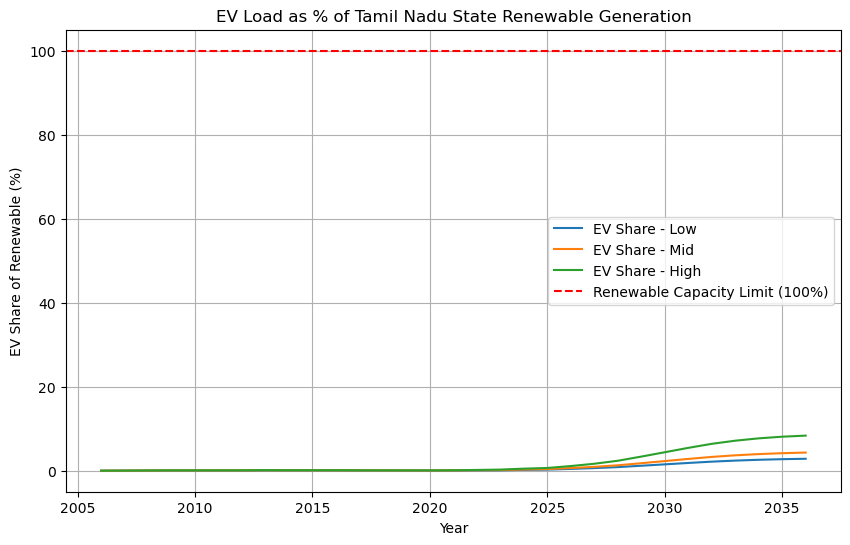

In [210]:
plt.figure(figsize=(10,6))
plt.plot(ev_renew["year"], ev_renew["ev_share_low_%"], label="EV Share - Low")
plt.plot(ev_renew["year"], ev_renew["ev_share_mid_%"], label="EV Share - Mid")
plt.plot(ev_renew["year"], ev_renew["ev_share_high_%"], label="EV Share - High")

plt.axhline(100, color="red", linestyle="--", label="Renewable Capacity Limit (100%)")

plt.xlabel("Year")
plt.ylabel("EV Share of Renewable (%)")
plt.title("EV Load as % of Tamil Nadu State Renewable Generation")
plt.legend()
plt.grid(True)
#plt.savefig("ev_renew_comp.png", dpi=300, bbox_inches='tight')
plt.show()

## Renewable Adequacy Ratio (RAR)

| RAR Value | Meaning                                   |
| --------- | ----------------------------------------- |
| **> 10**  | Strongly Adequate – No strain             |
| **3–10**  | Adequate – Safe zone                      |
| **1–3**   | Warning zone – close to strain            |
| **< 1**   | Strain – Renewable cannot support EV load |


In [211]:
# Compute Renewable Adequacy Ratio
ev_renew["RAR_low"] = ev_renew["renew_state_GWh"] / ev_renew["fleet_energy_low_GWh"]
ev_renew["RAR_mid"] = ev_renew["renew_state_GWh"] / ev_renew["fleet_energy_mid_GWh"]
ev_renew["RAR_high"] = ev_renew["renew_state_GWh"] / ev_renew["fleet_energy_high_GWh"]

ev_renew

,year,renew_state_GWh,fleet_energy_low_GWh,fleet_energy_mid_GWh,fleet_energy_high_GWh,ev_share_low_%,ev_share_mid_%,ev_share_high_%,RAR_low,RAR_mid,RAR_high
0,2006,9554.750000,0.753530,1.030155,1.316710,0.007886,0.010782,0.013781,12679.986198,9275.060549,7256.533329
1,2007,11782.110000,2.787835,3.680360,4.596195,0.023662,0.031237,0.039010,4226.258010,3201.347151,2563.448679
2,2008,10894.072000,4.791505,6.242105,7.752305,0.043983,0.057298,0.071161,2273.622171,1745.256128,1405.268756
3,2009,10333.129000,5.922055,7.761115,9.862940,0.057311,0.075109,0.095450,1744.855291,1331.397486,1047.672296
4,2010,11282.979000,6.371245,8.394840,10.829660,0.056468,0.074403,0.095982,1770.922167,1344.037409,1041.859024
5,2011,11784.732000,7.248720,9.567745,12.372525,0.061509,0.081188,0.104988,1625.767308,1231.714683,952.492074
6,2012,13206.978000,8.344285,11.013905,14.236700,0.063181,0.083395,0.107797,1582.757300,1199.118569,927.671300
7,2013,11054.026000,9.535605,12.575380,16.212060,0.086264,0.113763,0.146662,1159.236986,879.021230,681.839692
8,2014,13390.001000,9.990950,13.260985,17.128785,0.074615,0.099036,0.127922,1340.212993,1009.728991,781.725090
9,2015,13842.102000,10.354050,13.774725,17.791440,0.074801,0.099513,0.128531,1336.878033,1004.891350,778.020329


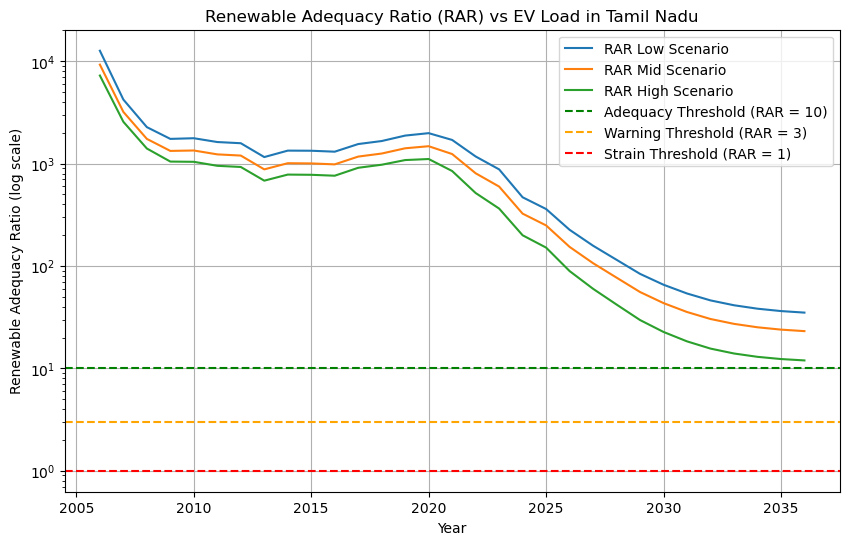

In [212]:
plt.figure(figsize=(10,6))

plt.plot(ev_renew["year"], ev_renew["RAR_low"], label="RAR Low Scenario")
plt.plot(ev_renew["year"], ev_renew["RAR_mid"], label="RAR Mid Scenario")
plt.plot(ev_renew["year"], ev_renew["RAR_high"], label="RAR High Scenario")

plt.axhline(10, color="green", linestyle="--", label="Adequacy Threshold (RAR = 10)")
plt.axhline(3, color="orange", linestyle="--", label="Warning Threshold (RAR = 3)")
plt.axhline(1, color="red", linestyle="--", label="Strain Threshold (RAR = 1)")

plt.yscale("log")  # log scale makes the curves easier to read
plt.xlabel("Year")
plt.ylabel("Renewable Adequacy Ratio (log scale)")
plt.title("Renewable Adequacy Ratio (RAR) vs EV Load in Tamil Nadu")
plt.legend()
plt.grid(True)
#plt.savefig("rar.png", dpi=300, bbox_inches='tight')
plt.show()